--
Insert Nessesarry Modules

In [1]:
#Pandas is module for working in a dataset
#have function to clean, transform, and analyze data
import pandas as pd

#Numpy is module for working with arrays and scientific computing
import numpy as np

#Matplotlib is module for creating static, animated, and interactive visualizations in Python
import matplotlib.pyplot as plt

#Seaborn is module for creating statistical graphics
import seaborn as sns

from sklearn.datasets import fetch_california_housing



In [2]:
from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing()
print(housing.data.shape, housing.target.shape)
print(housing.DESCR)

(20640, 8) (20640,)
.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

:Number of Instances: 20640

:Number of Attributes: 8 numeric, predictive attributes and the target

:Attribute Information:
    - MedInc        median income in block group
    - HouseAge      median house age in block group
    - AveRooms      average number of rooms per household
    - AveBedrms     average number of bedrooms per household
    - Population    block group population
    - AveOccup      average number of household members
    - Latitude      block group latitude
    - Longitude     block group longitude

:Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived from the 1990 U.S. census, 

In [3]:
# Fetch California Housing dataset
california = fetch_california_housing()

# Create DataFrame with features
df = pd.DataFrame(california.data, columns=california.feature_names)

# Add target variable
df['MedHouseVal'] = california.target

print(f"Dataset loaded! Shape: {df.shape}")
df.sort_values(by='MedInc')

Dataset loaded! Shape: (20640, 9)


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
19523,0.4999,52.0,2.870968,0.854839,152.0,2.451613,37.65,-121.01,0.82500
7125,0.4999,36.0,2.500000,0.833333,15.0,2.500000,33.90,-118.04,1.62500
6343,0.4999,52.0,3.875000,0.562500,44.0,2.750000,34.06,-117.75,1.12500
13999,0.4999,10.0,6.740000,2.040000,108.0,2.160000,34.69,-116.90,0.55000
20091,0.4999,43.0,7.846154,1.461538,44.0,3.384615,38.07,-120.19,1.62500
...,...,...,...,...,...,...,...,...,...
8849,15.0001,52.0,9.237288,1.062954,1266.0,3.065375,34.08,-118.40,5.00001
18501,15.0001,52.0,8.461538,1.230769,55.0,2.115385,37.19,-121.59,1.31300
6399,15.0001,35.0,8.586207,1.068966,268.0,9.241379,34.13,-118.04,5.00001
18504,15.0001,26.0,12.500000,1.250000,17.0,4.250000,37.13,-121.96,4.00000


In [4]:
# Check total missing values per column
print(df.isna().sum())

MedInc         0
HouseAge       0
AveRooms       0
AveBedrms      0
Population     0
AveOccup       0
Latitude       0
Longitude      0
MedHouseVal    0
dtype: int64


In [5]:
# 1. House Age Group
df['age_group'] = pd.cut(df['HouseAge'], 
                         bins=[0, 15, 30, 52],
                         labels=['New', 'Mid-Age', 'Old'])

# 2. Price Category (target grouping)
df['price_category'] = pd.cut(df['MedHouseVal'],
                              bins=[0, 1.5, 3, 5.1],
                              labels=['Affordable', 'Moderate', 'Expensive'])

# 3. Location Type (Coastal vs Inland)
df['location_type'] = df['Longitude'].apply(
    lambda x: 'Coastal' if x < -121 else 'Inland')

# 4. Population Density
df['density'] = pd.cut(df['Population'],
                       bins=[0, 500, 1500, 40000],
                       labels=['Low', 'Medium', 'High'])

# 5. Room Size Category
df['room_size'] = pd.cut(df['AveRooms'],
                         bins=[0, 4, 6, 8, 150],
                         labels=['Small', 'Medium', 'Large', 'Very Large'])

# 6. Occupancy Level
df['occupancy_level'] = pd.cut(df['AveOccup'],
                               bins=[0, 2, 4, 1500],
                               labels=['Low', 'Normal', 'Crowded'])

# 7. California Region (using Latitude)
df['region'] = pd.cut(df['Latitude'],
                      bins=[32, 35, 37, 42],
                      labels=['SoCal', 'Central', 'NorCal'])

df['income_group'] = pd.cut(df['MedInc'],
                            bins=[0, 4, 8, 12, df['MedInc'].max()],
                            labels=[
                                "Low (<$40k)",
                                "Middle ($40k–$80k)",
                                "Upper-Middle ($80k–$120k)",
                                "Rich (≥$120k)"
                            ])

In [6]:
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal,age_group,price_category,location_type,density,room_size,occupancy_level,region,income_group
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526,Old,Expensive,Coastal,Low,Large,Normal,NorCal,Upper-Middle ($80k–$120k)
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585,Mid-Age,Expensive,Coastal,High,Large,Normal,NorCal,Upper-Middle ($80k–$120k)
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521,Old,Expensive,Coastal,Low,Very Large,Normal,NorCal,Middle ($40k–$80k)
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413,Old,Expensive,Coastal,Medium,Medium,Normal,NorCal,Middle ($40k–$80k)
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422,Old,Expensive,Coastal,Medium,Large,Normal,NorCal,Low (<$40k)


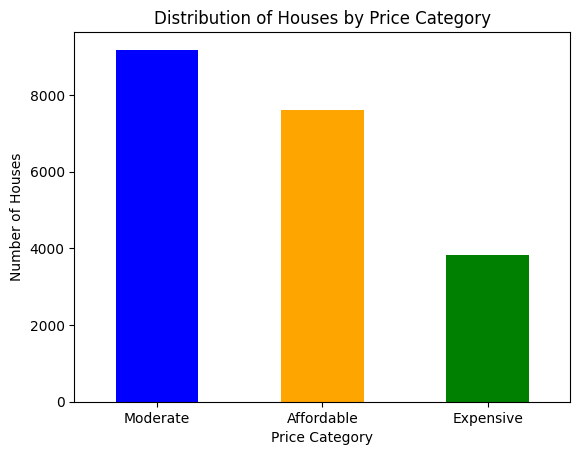

In [7]:
df['price_category'].value_counts().plot(kind='bar', color=['blue', 'orange', 'green'])
plt.title("Distribution of Houses by Price Category")
plt.xlabel("Price Category")
plt.ylabel("Number of Houses")
plt.xticks(rotation=0)
plt.show()

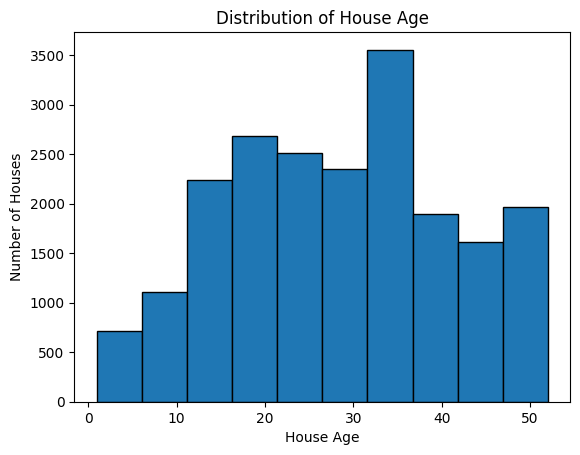

In [8]:
plt.hist(df['HouseAge'], bins=10, edgecolor='black')
plt.xlabel('House Age')
plt.ylabel('Number of Houses')
plt.title('Distribution of House Age')
plt.show()

C:\Users\francis\AppData\Local\Temp\ipykernel_21564\477604530.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  location_income_counts = df.groupby(["location_type", "income_group"])["MedInc"].count().unstack()


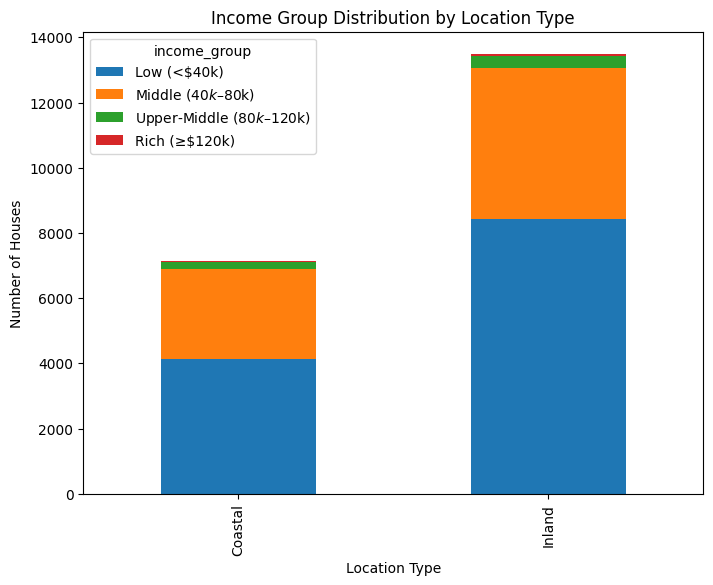

In [9]:
location_income_counts = df.groupby(["location_type", "income_group"])["MedInc"].count().unstack()
location_income_counts.plot(kind="bar", stacked=True, figsize=(8,6))
plt.title("Income Group Distribution by Location Type")
plt.xlabel("Location Type")
plt.ylabel("Number of Houses")
plt.show()

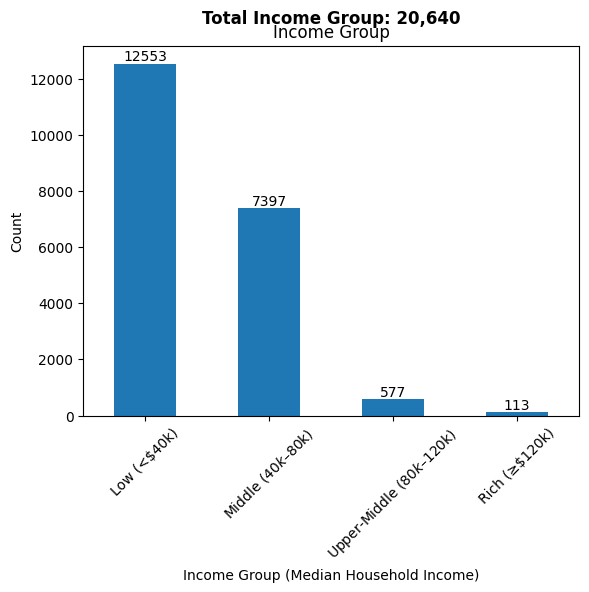

In [10]:
income_group_count = df["income_group"].value_counts().sort_index()
income_group_total = df['income_group'].count()

ax = income_group_count.plot(kind="bar")

plt.xlabel("Income Group (Median Household Income)")
plt.ylabel("Count")
plt.title("Income Group")
plt.xticks(rotation=45)

# Add count labels on top of bars
for i, value in enumerate(income_group_count):
    ax.text(i, value, str(value), ha="center", va="bottom")

# Add total population text above the chart
plt.text(
    0.5,                    # x-position (0=left, 1=right)
    1.05,                   # y-position (just above top of plot)
    f"Total Income Group: {int(income_group_total):,}", 
    ha="center", 
    va="bottom", 
    transform=ax.transAxes, # important: coordinates relative to axes
    fontsize=12,
    fontweight="bold"
)



plt.show()

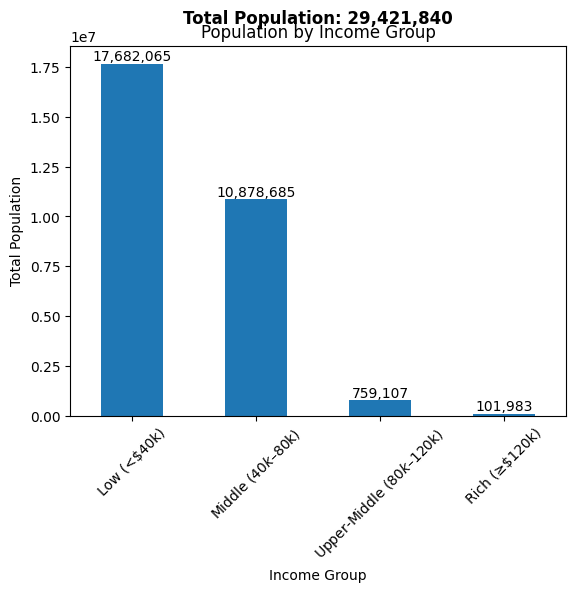

In [11]:


total_population = df["Population"].sum()

population_income_group = (
    df.groupby("income_group", observed=True)["Population"]
      .sum()
      .sort_index()
)

ax = population_income_group.plot(kind="bar")

plt.xlabel("Income Group")
plt.ylabel("Total Population")
plt.xticks(rotation=45)
plt.title("Population by Income Group")

# Add value labels on top of bars
for i, value in enumerate(population_income_group):
    ax.text(i, value, f"{int(value):,}", ha="center", va="bottom")

# Add total population text above the chart
plt.text(
    0.5,                    # x-position (0=left, 1=right)
    1.05,                   # y-position (just above top of plot)
    f"Total Population: {int(total_population):,}", 
    ha="center", 
    va="bottom", 
    transform=ax.transAxes, # important: coordinates relative to axes
    fontsize=12,
    fontweight="bold"
)

plt.show()

In [12]:
df.head(5)

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal,age_group,price_category,location_type,density,room_size,occupancy_level,region,income_group
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526,Old,Expensive,Coastal,Low,Large,Normal,NorCal,Upper-Middle ($80k–$120k)
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585,Mid-Age,Expensive,Coastal,High,Large,Normal,NorCal,Upper-Middle ($80k–$120k)
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521,Old,Expensive,Coastal,Low,Very Large,Normal,NorCal,Middle ($40k–$80k)
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413,Old,Expensive,Coastal,Medium,Medium,Normal,NorCal,Middle ($40k–$80k)
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422,Old,Expensive,Coastal,Medium,Large,Normal,NorCal,Low (<$40k)


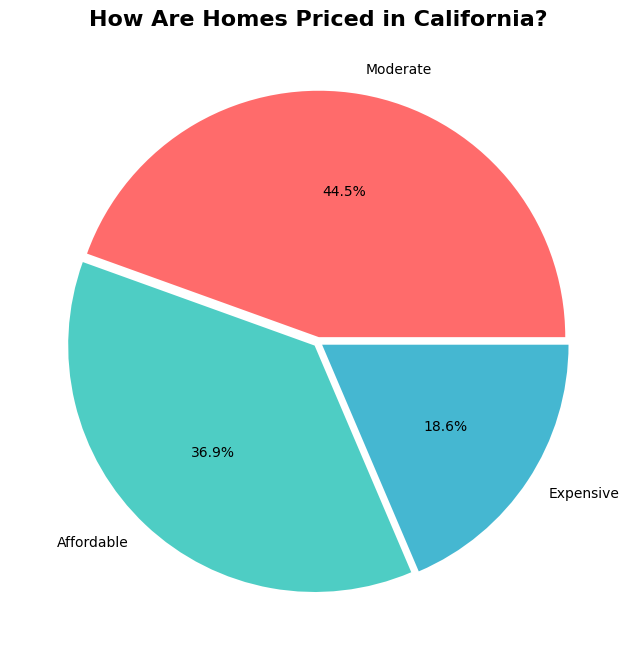

C:\Users\francis\AppData\Local\Temp\ipykernel_21564\1242103324.py:12: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  region_avg = df.groupby('region')['MedHouseVal'].mean()


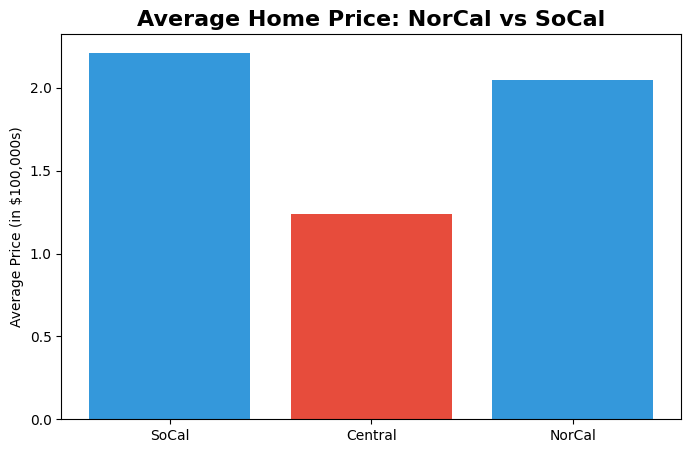

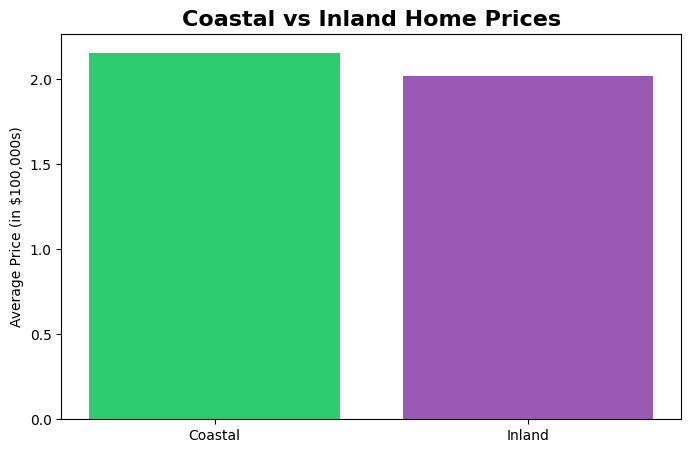

In [13]:
import matplotlib.pyplot as plt

# 1. PIE CHART - Price Categories
price_counts = df['price_category'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(price_counts, labels=price_counts.index, autopct='%1.1f%%', 
        colors=['#ff6b6b', '#4ecdc4', '#45b7d1'], explode=[0.02]*len(price_counts))
plt.title('How Are Homes Priced in California?', fontsize=16, fontweight='bold')
plt.show()

# 2. BAR CHART - Region Comparison
region_avg = df.groupby('region')['MedHouseVal'].mean()
plt.figure(figsize=(8, 5))
plt.bar(region_avg.index, region_avg.values, color=['#3498db', '#e74c3c'])
plt.title('Average Home Price: NorCal vs SoCal', fontsize=16, fontweight='bold')
plt.ylabel('Average Price (in $100,000s)')
plt.show()

# 3. Simple Comparison Bar - Location Type
loc_avg = df.groupby('location_type')['MedHouseVal'].mean()
plt.figure(figsize=(8, 5))
plt.bar(loc_avg.index, loc_avg.values, color=['#2ecc71', '#9b59b6'])
plt.title('Coastal vs Inland Home Prices', fontsize=16, fontweight='bold')
plt.ylabel('Average Price (in $100,000s)')
plt.show()

In [14]:
categorical_columns = [
    'income_group',
    'age_group',
    'price_category',
    'location_type',
    'density',
    'room_size',
    'occupancy_level',
    'region'
]


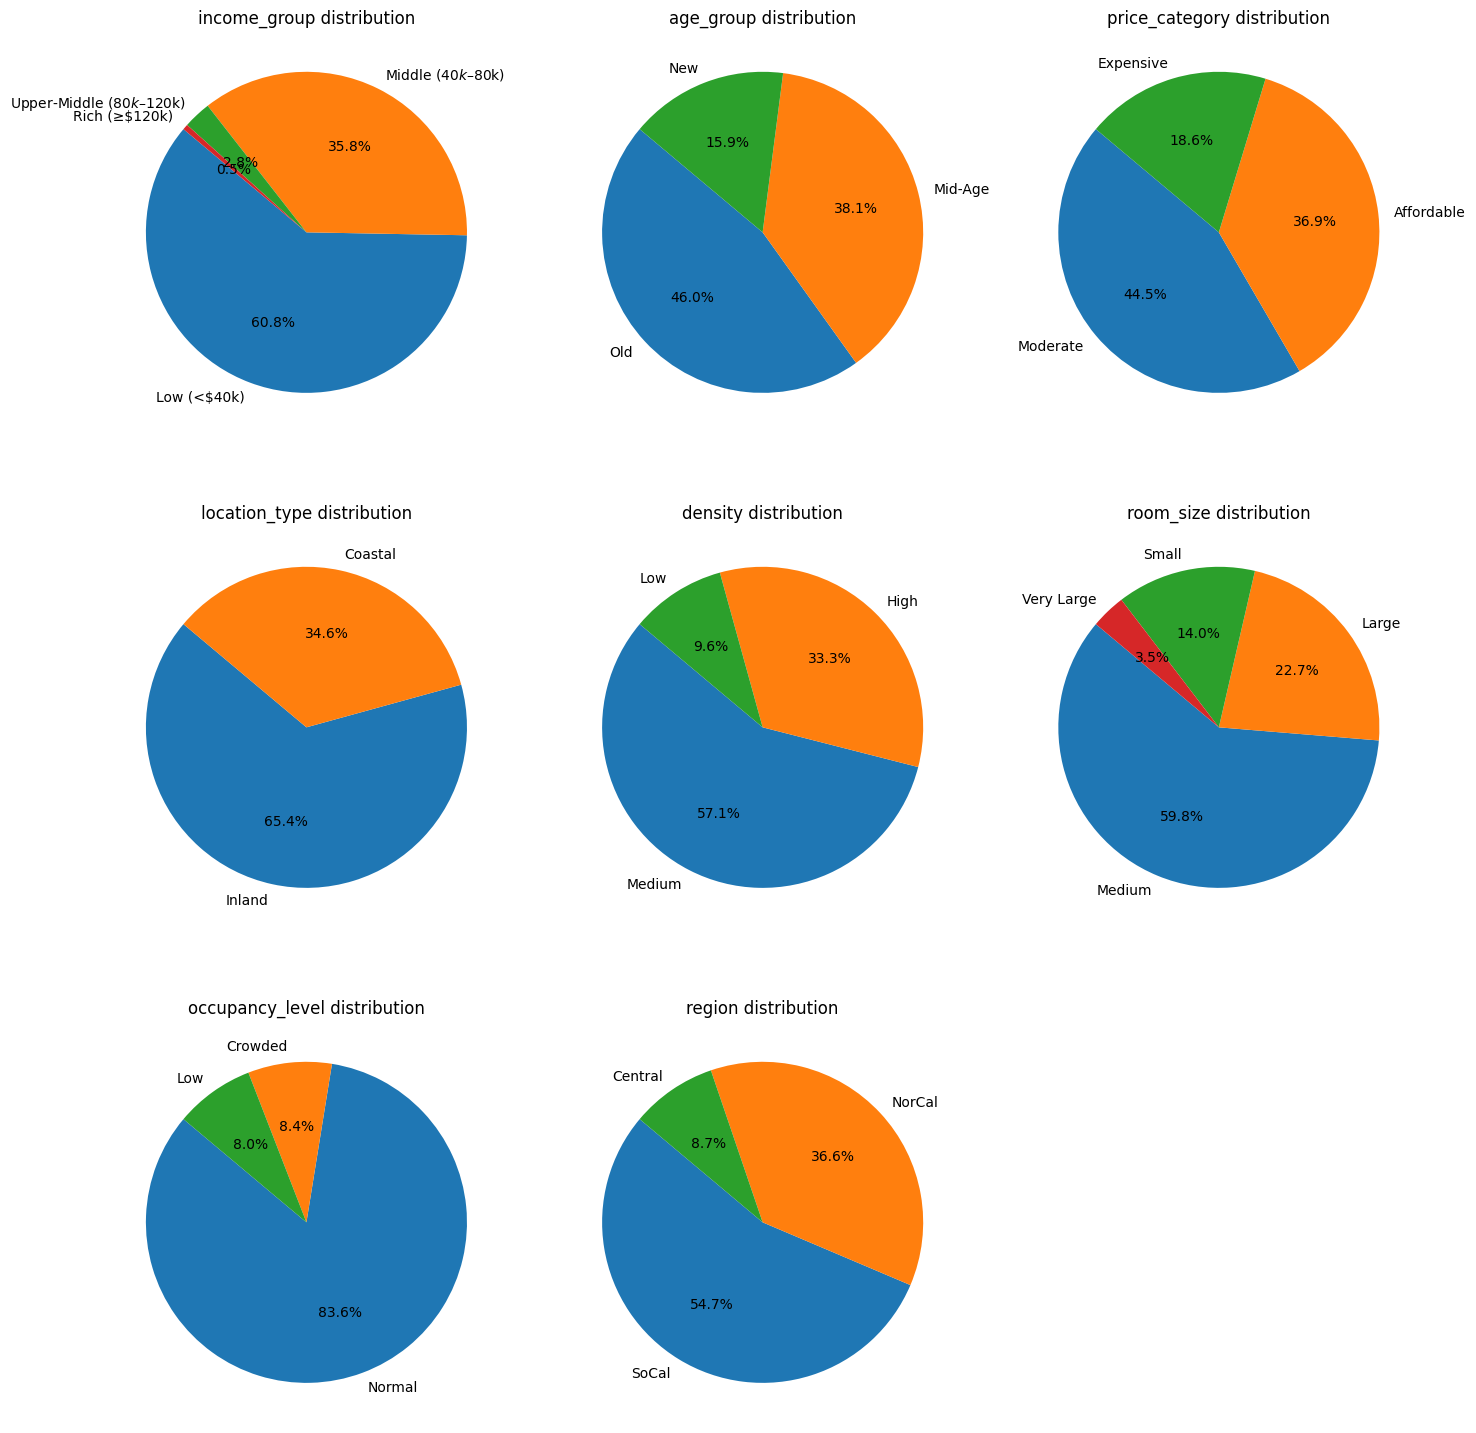

In [15]:
# Number of categories
n = len(categorical_columns)

# Determine number of rows and columns for subplot
cols = 3
rows = (n + cols - 1) // cols  # ensures we have enough rows

fig, axes = plt.subplots(rows, cols, figsize=(15, rows * 5))
axes = axes.flatten()  # flatten so we can iterate easily

for i, col in enumerate(categorical_columns):
    counts = df[col].value_counts()
    axes[i].pie(counts, labels=counts.index, autopct='%1.1f%%', startangle=140)
    axes[i].set_title(f'{col} distribution')

# Remove empty subplots
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


In [23]:

sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (14, 8)
plt.rcParams['font.size'] = 11

print("🏠 HOUSING DATA ANALYSIS - GENERATING CLIENT REPORT")
print("="*70)

# ============================================
# 1. LOAD THE DATA
# ============================================
print("\n📂 Loading data...")

print(f"✓ Successfully loaded {len(df):,} properties!")

# ============================================
# 2. CHECK FOR MISSING DATA
# ============================================
print("\n🔍 Checking data quality...")
missing = df.isnull().sum()
if missing.sum() > 0:
    print("⚠️  Found missing values - cleaning data...")
    # Fill numeric columns with median
    for col in df.select_dtypes(include=[np.number]).columns:
        if df[col].isnull().sum() > 0:
            df[col].fillna(df[col].median(), inplace=True)
    # Fill categorical with most common value
    for col in df.select_dtypes(include=['object']).columns:
        if df[col].isnull().sum() > 0:
            df[col].fillna(df[col].mode()[0], inplace=True)
    print("✓ Data cleaned successfully!")
else:
    print("✓ No missing data - quality looks good!")

# ============================================
# 3. CREATE CLIENT-FRIENDLY SUMMARY
# ============================================
print("\n📊 Generating summary statistics...")

summary_report = f"""
{'='*70}
                    HOUSING MARKET SUMMARY REPORT
{'='*70}

DATASET OVERVIEW:
• Total Properties Analyzed: {len(df):,}
• Number of Features: {len(df.columns)}

HOUSE PRICES (Median House Value):
• Average Price: ${df['MedHouseVal'].mean()*100:.2f}k
• Median Price: ${df['MedHouseVal'].median()*100:.2f}k
• Lowest Price: ${df['MedHouseVal'].min()*100:.2f}k
• Highest Price: ${df['MedHouseVal'].max()*100:.2f}k
• Price Range: ${(df['MedHouseVal'].max() - df['MedHouseVal'].min())*100:.2f}k

PROPERTY CHARACTERISTICS:
• Average House Age: {df['HouseAge'].mean():.1f} years
• Average Rooms per House: {df['AveRooms'].mean():.1f}
• Average Bedrooms per House: {df['AveBedrms'].mean():.1f}
• Average Household Size: {df['AveOccup'].mean():.1f} people

INCOME LEVELS:
• Average Median Income: ${df['MedInc'].mean()*10:.2f}k per year
• Income Range: ${df['MedInc'].min()*10:.2f}k - ${df['MedInc'].max()*10:.2f}k

GEOGRAPHIC COVERAGE:
• Latitude Range: {df['Latitude'].min():.2f}° to {df['Latitude'].max():.2f}°
• Longitude Range: {df['Longitude'].min():.2f}° to {df['Longitude'].max():.2f}°

{'='*70}
"""

print(summary_report)

# Save text report
with open('Client_Summary_Report.txt', 'w') as f:
    f.write(summary_report)

# ============================================
# 4. CREATE EASY-TO-READ VISUALIZATIONS
# ============================================
print("\n🎨 Creating visualizations for client presentation...")

# Create PDF report with all visualizations
pdf_filename = 'Housing_Analysis_Client_Report.pdf'
pdf = PdfPages(pdf_filename)

# CHART 1: House Price Distribution
fig, ax = plt.subplots(figsize=(14, 8))
ax.hist(df['MedHouseVal']*100, bins=40, color='steelblue', edgecolor='black', alpha=0.7)
ax.axvline(df['MedHouseVal'].mean()*100, color='red', linestyle='--', linewidth=2, 
           label=f'Average: ${df["MedHouseVal"].mean()*100:.0f}k')
ax.axvline(df['MedHouseVal'].median()*100, color='green', linestyle='--', linewidth=2,
           label=f'Median: ${df["MedHouseVal"].median()*100:.0f}k')
ax.set_xlabel('House Price (in $1000s)', fontsize=14, fontweight='bold')
ax.set_ylabel('Number of Houses', fontsize=14, fontweight='bold')
ax.set_title('How House Prices are Distributed', fontsize=16, fontweight='bold', pad=20)
ax.legend(fontsize=12)
ax.grid(axis='y', alpha=0.3)
plt.tight_layout()
pdf.savefig(fig)
plt.close()

# CHART 2: What Affects House Prices?
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Income vs Price
axes[0, 0].scatter(df['MedInc']*10, df['MedHouseVal']*100, alpha=0.4, color='green', s=30)
axes[0, 0].set_xlabel('Median Income ($1000s/year)', fontsize=12, fontweight='bold')
axes[0, 0].set_ylabel('House Price ($1000s)', fontsize=12, fontweight='bold')
axes[0, 0].set_title('Higher Income Areas = Higher Prices', fontsize=14, fontweight='bold')
axes[0, 0].grid(alpha=0.3)

# House Age vs Price
axes[0, 1].scatter(df['HouseAge'], df['MedHouseVal']*100, alpha=0.4, color='orange', s=30)
axes[0, 1].set_xlabel('House Age (years)', fontsize=12, fontweight='bold')
axes[0, 1].set_ylabel('House Price ($1000s)', fontsize=12, fontweight='bold')
axes[0, 1].set_title('House Age vs Price', fontsize=14, fontweight='bold')
axes[0, 1].grid(alpha=0.3)

# Rooms vs Price
axes[1, 0].scatter(df['AveRooms'], df['MedHouseVal']*100, alpha=0.4, color='purple', s=30)
axes[1, 0].set_xlabel('Average Number of Rooms', fontsize=12, fontweight='bold')
axes[1, 0].set_ylabel('House Price ($1000s)', fontsize=12, fontweight='bold')
axes[1, 0].set_title('More Rooms = Higher Prices', fontsize=14, fontweight='bold')
axes[1, 0].grid(alpha=0.3)
axes[1, 0].set_xlim(0, 15)

# Population vs Price
axes[1, 1].scatter(df['Population'], df['MedHouseVal']*100, alpha=0.4, color='red', s=30)
axes[1, 1].set_xlabel('Area Population', fontsize=12, fontweight='bold')
axes[1, 1].set_ylabel('House Price ($1000s)', fontsize=12, fontweight='bold')
axes[1, 1].set_title('Population vs Price', fontsize=14, fontweight='bold')
axes[1, 1].grid(alpha=0.3)

plt.tight_layout()
pdf.savefig(fig)
plt.close()

# CHART 3: Price Categories
fig, ax = plt.subplots(figsize=(14, 8))
price_counts = df['price_category'].value_counts()
colors = ['#ff6b6b', '#4ecdc4', '#45b7d1', '#96ceb4']
bars = ax.bar(price_counts.index, price_counts.values, color=colors, edgecolor='black', linewidth=1.5)
ax.set_xlabel('Price Category', fontsize=14, fontweight='bold')
ax.set_ylabel('Number of Properties', fontsize=14, fontweight='bold')
ax.set_title('How Many Properties in Each Price Range?', fontsize=16, fontweight='bold', pad=20)
ax.grid(axis='y', alpha=0.3)
# Add value labels on bars
for bar in bars:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2., height,
            f'{int(height):,}',
            ha='center', va='bottom', fontsize=12, fontweight='bold')
plt.tight_layout()
pdf.savefig(fig)
plt.close()

# CHART 4: Location Types
fig, ax = plt.subplots(figsize=(14, 8))
location_counts = df['location_type'].value_counts()
colors_loc = ['#3498db', '#e74c3c', '#2ecc71', '#f39c12']
bars = ax.barh(location_counts.index, location_counts.values, color=colors_loc, edgecolor='black', linewidth=1.5)
ax.set_xlabel('Number of Properties', fontsize=14, fontweight='bold')
ax.set_ylabel('Location Type', fontsize=14, fontweight='bold')
ax.set_title('Where Are These Houses Located?', fontsize=16, fontweight='bold', pad=20)
ax.grid(axis='x', alpha=0.3)
# Add value labels
for i, bar in enumerate(bars):
    width = bar.get_width()
    ax.text(width, bar.get_y() + bar.get_height()/2.,
            f' {int(width):,}',
            ha='left', va='center', fontsize=12, fontweight='bold')
plt.tight_layout()
pdf.savefig(fig)
plt.close()

# CHART 5: Income Groups
fig, ax = plt.subplots(figsize=(14, 8))
income_counts = df['income_group'].value_counts()
colors_income = ['#1abc9c', '#3498db', '#9b59b6', '#e67e22', '#e74c3c']
bars = ax.bar(range(len(income_counts)), income_counts.values, color=colors_income, edgecolor='black', linewidth=1.5)
ax.set_xticks(range(len(income_counts)))
ax.set_xticklabels(income_counts.index, rotation=45, ha='right')
ax.set_xlabel('Income Group', fontsize=14, fontweight='bold')
ax.set_ylabel('Number of Areas', fontsize=14, fontweight='bold')
ax.set_title('Income Distribution Across Areas', fontsize=16, fontweight='bold', pad=20)
ax.grid(axis='y', alpha=0.3)
for bar in bars:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2., height,
            f'{int(height):,}',
            ha='center', va='bottom', fontsize=11, fontweight='bold')
plt.tight_layout()
pdf.savefig(fig)
plt.close()

# CHART 6: Geographic Map
fig, ax = plt.subplots(figsize=(14, 10))
scatter = ax.scatter(df['Longitude'], df['Latitude'], 
                     c=df['MedHouseVal']*100, s=50, alpha=0.6,
                     cmap='RdYlGn', edgecolors='black', linewidth=0.5)
cbar = plt.colorbar(scatter, ax=ax)
cbar.set_label('House Price ($1000s)', fontsize=12, fontweight='bold')
ax.set_xlabel('Longitude (West to East)', fontsize=14, fontweight='bold')
ax.set_ylabel('Latitude (South to North)', fontsize=14, fontweight='bold')
ax.set_title('Where Are the Most Expensive Houses?\n(Green = Expensive, Red = Affordable)', 
             fontsize=16, fontweight='bold', pad=20)
ax.grid(alpha=0.3)
plt.tight_layout()
pdf.savefig(fig)
plt.close()

# CHART 7: Average Price by Region
if 'region' in df.columns:
    fig, ax = plt.subplots(figsize=(14, 8))
    avg_price_region = df.groupby('region')['MedHouseVal'].mean().sort_values(ascending=True) * 100
    colors_region = plt.cm.viridis(np.linspace(0, 1, len(avg_price_region)))
    bars = ax.barh(avg_price_region.index, avg_price_region.values, color=colors_region, 
                   edgecolor='black', linewidth=1.5)
    ax.set_xlabel('Average House Price ($1000s)', fontsize=14, fontweight='bold')
    ax.set_ylabel('Region', fontsize=14, fontweight='bold')
    ax.set_title('Average House Prices by Region', fontsize=16, fontweight='bold', pad=20)
    ax.grid(axis='x', alpha=0.3)
    for bar in bars:
        width = bar.get_width()
        ax.text(width, bar.get_y() + bar.get_height()/2.,
                f' ${width:.0f}k',
                ha='left', va='center', fontsize=12, fontweight='bold')
    plt.tight_layout()
    pdf.savefig(fig)
    plt.close()

# CHART 8: House Age Distribution
fig, ax = plt.subplots(figsize=(14, 8))
age_counts = df['age_group'].value_counts()
colors_age = ['#e74c3c', '#f39c12', '#3498db']
explode = [0.05] * len(age_counts)
wedges, texts, autotexts = ax.pie(age_counts.values, labels=age_counts.index, autopct='%1.1f%%',
                                    colors=colors_age, explode=explode, startangle=90,
                                    textprops={'fontsize': 14, 'fontweight': 'bold'})
ax.set_title('How Old Are These Houses?', fontsize=16, fontweight='bold', pad=20)
plt.tight_layout()
pdf.savefig(fig)
plt.close()

# Close PDF
pdf.close()

print(f"✓ Client report saved as '{pdf_filename}'")

# ============================================
# 5. KEY INSIGHTS FOR CLIENT
# ============================================
print("\n" + "="*70)
print("📋 KEY FINDINGS FOR YOUR CLIENT:")
print("="*70)

# Find correlations
correlations = df[['MedInc', 'HouseAge', 'AveRooms', 'MedHouseVal']].corr()['MedHouseVal'].sort_values(ascending=False)

insights = f"""
1. STRONGEST PRICE FACTOR:
   Income level has the biggest impact on house prices.
   Correlation: {correlations['MedInc']:.2f} (very strong!)

2. HOUSE SIZE MATTERS:
   More rooms generally mean higher prices.
   Correlation: {correlations['AveRooms']:.2f}

3. AGE FACTOR:
   House age has {correlations['HouseAge']:.2f} correlation with price.

4. MOST COMMON PRICE RANGE:
   {df['price_category'].value_counts().index[0]} properties dominate the market
   ({df['price_category'].value_counts().values[0]:,} properties)

5. LOCATION PREFERENCE:
   Most properties are in {df['location_type'].value_counts().index[0]} areas
   ({df['location_type'].value_counts().values[0]:,} properties)

6. TYPICAL HOUSE:
   • Age: {df['HouseAge'].median():.0f} years old
   • Rooms: {df['AveRooms'].median():.1f} rooms
   • Price: ${df['MedHouseVal'].median()*100:.0f}k
"""

print(insights)

# Save insights
with open('Client_Key_Insights.txt', 'w') as f:
    f.write("="*70 + "\n")
    f.write("KEY INSIGHTS FOR CLIENT PRESENTATION\n")
    f.write("="*70 + "\n")
    f.write(insights)

print("\n" + "="*70)
print("✅ ANALYSIS COMPLETE!")
print("="*70)
print("\nFiles created for your client:")
print(f"  1. {pdf_filename} - Visual report with all charts")
print("  2. Client_Summary_Report.txt - Text summary")
print("  3. Client_Key_Insights.txt - Key findings")
print("\nThese files are ready to share with non-technical clients! 🎉")
print("="*70)

🏠 HOUSING DATA ANALYSIS - GENERATING CLIENT REPORT

📂 Loading data...
✓ Successfully loaded 20,640 properties!

🔍 Checking data quality...
✓ No missing data - quality looks good!

📊 Generating summary statistics...

                    HOUSING MARKET SUMMARY REPORT

DATASET OVERVIEW:
• Total Properties Analyzed: 20,640
• Number of Features: 17

HOUSE PRICES (Median House Value):
• Average Price: $206.86k
• Median Price: $179.70k
• Lowest Price: $15.00k
• Highest Price: $500.00k
• Price Range: $485.00k

PROPERTY CHARACTERISTICS:
• Average House Age: 28.6 years
• Average Rooms per House: 5.4
• Average Bedrooms per House: 1.1
• Average Household Size: 3.1 people

INCOME LEVELS:
• Average Median Income: $38.71k per year
• Income Range: $5.00k - $150.00k

GEOGRAPHIC COVERAGE:
• Latitude Range: 32.54° to 41.95°
• Longitude Range: -124.35° to -114.31°



🎨 Creating visualizations for client presentation...
✓ Client report saved as 'Housing_Analysis_Client_Report.pdf'

📋 KEY FINDINGS FOR YOUR 

C:\Users\francis\AppData\Local\Temp\ipykernel_21564\2195917116.py:216: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_price_region = df.groupby('region')['MedHouseVal'].mean().sort_values(ascending=True) * 100
